In [64]:
import requests
import pandas as pd
import seaborn as sns

In [154]:
# url = "https://api.cqc.org.uk/public/v1/locations?page=1&perPage=10&partnerCode=OpenAnswers"

params_dict = {'perPage':10000,
               'partnerCode':"OpenAnswers"}



In [155]:
url = "https://api.cqc.org.uk/public/v1/locations/?partnerCode=OpenAnswers&careHome=Y"
url_endpoint = "https://api.cqc.org.uk/public/v1/locations?" 
response = requests.get(url_endpoint, params_dict)
output_dict = response.json()
output_dict

{'total': 107371,
 'firstPageUri': '/locations?page=1&perPage=10000&partnerCode=OpenAnswers',
 'page': 1,
 'previousPageUri': None,
 'lastPageUri': '/locations?page=11&perPage=10000&partnerCode=OpenAnswers',
 'nextPageUri': '/locations?page=2&perPage=10000&partnerCode=OpenAnswers',
 'perPage': 10000,
 'totalPages': 11,
 'locations': [{'locationId': '1-10000302982',
   'locationName': 'Henley House',
   'postalCode': 'IP1 6TB'},
  {'locationId': '1-10000367985',
   'locationName': 'Hertility Health',
   'postalCode': 'E11 3RB'},
  {'locationId': '1-10000433668',
   'locationName': 'Home Visiting Service',
   'postalCode': 'NE8 4YL'},
  {'locationId': '1-10000697432',
   'locationName': 'Vara Dental Practice',
   'postalCode': 'E12 6SA'},
  {'locationId': '1-10000792582',
   'locationName': 'Orchids Care',
   'postalCode': 'DN4 9PE'},
  {'locationId': '1-10000812939',
   'locationName': 'Charlotte House',
   'postalCode': 'CH63 3DZ'},
  {'locationId': '1-10000813008',
   'locationName': 

In [158]:
len(output_dict['locations'])

10000

In [162]:
locations = output_dict['locations']
locations[0].get('locationID', "null")
locations

[{'locationId': '1-10000302982',
  'locationName': 'Henley House',
  'postalCode': 'IP1 6TB'},
 {'locationId': '1-10000367985',
  'locationName': 'Hertility Health',
  'postalCode': 'E11 3RB'},
 {'locationId': '1-10000433668',
  'locationName': 'Home Visiting Service',
  'postalCode': 'NE8 4YL'},
 {'locationId': '1-10000697432',
  'locationName': 'Vara Dental Practice',
  'postalCode': 'E12 6SA'},
 {'locationId': '1-10000792582',
  'locationName': 'Orchids Care',
  'postalCode': 'DN4 9PE'},
 {'locationId': '1-10000812939',
  'locationName': 'Charlotte House',
  'postalCode': 'CH63 3DZ'},
 {'locationId': '1-10000813008',
  'locationName': 'Regency Care Centre',
  'postalCode': 'M45 7SG'},
 {'locationId': '1-10001367005',
  'locationName': '218 Smile Clinic',
  'postalCode': 'HA1 4JU'},
 {'locationId': '1-10001408228',
  'locationName': 'Thistle24 Medical Group Ltd',
  'postalCode': 'S71 1AQ'},
 {'locationId': '1-10001702698',
  'locationName': 'Custom Care (North Staffs)',
  'postalCode

In [163]:
location_names = []
lats = []
lons = []
num_beds = []
town_city = []
region = []
carehome_y_n = []

for i in locations:
    loc = (i['locationId'])
    loc_url = f"https://api.cqc.org.uk/public/v1/locations/{loc}?partnerCode=OpenAnswers"
    loc_response = requests.get(loc_url).json()
    lats.append(loc_response.get('onspdLatitude', 'N/A'))
    lons.append(loc_response.get('onspdLongitude', 'N/A'))
    location_names.append(loc_response.get('name', 'N/A'))
    num_beds.append(loc_response.get('numberOfBeds', 'N/A'))
    town_city.append(loc_response.get('postalAddressTownCity', 'N/A'))
    region.append(loc_response.get('region', 'N/A'))
    carehome_y_n.append(loc_response.get('careHome', 'N/A'))


In [164]:
len(lats), len(lons), len(location_names), len(num_beds), len(town_city), len(region), len(carehome_y_n)

(10000, 10000, 10000, 10000, 10000, 10000, 10000)

In [147]:
# lats = lats[:-1]
# lons = lons[:-1]
# location_names = loc[:-1]

In [165]:
carehomes_df = pd.DataFrame(
    {'Location_Names': location_names,
     'latitude': lats,
     'longitude': lons,
     'num_beds': num_beds,
     'town_city': town_city,
     'region': region,
     'carehome_y_n': carehome_y_n
    })

In [166]:
carehomes_df = carehomes_df[carehomes_df['carehome_y_n'] == "Y"]

In [169]:
carehomes_df.to_csv("../raw_data/carehome_locations.csv")

<Axes: xlabel='longitude', ylabel='latitude'>

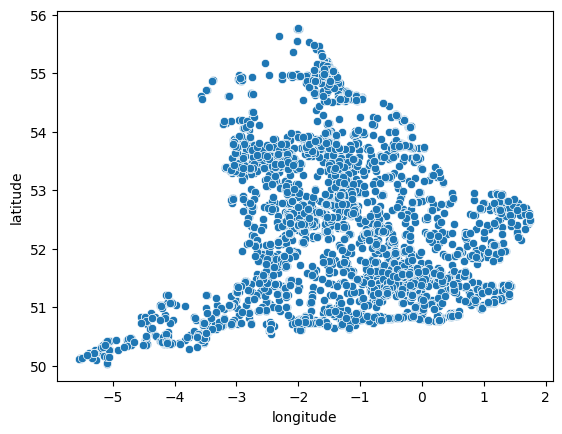

In [170]:
sns.scatterplot(x=carehomes_df['longitude'], y = carehomes_df['latitude'])

In [168]:
carehomes_df

,Location_Names,latitude,longitude,num_beds,town_city,region,carehome_y_n
0,Henley House,52.088019,1.150452,66,Ipswich,East,Y
5,Charlotte House,53.345515,-3.002580,103,Wirral,North West,Y
6,Regency Care Centre,53.558464,-2.295343,60,Bury,North West,Y
10,Kingswood House Nursing Home,50.857483,0.561912,22,St Leonards On Sea,South East,Y
13,Little Haven,51.442094,0.002853,15,London,London,Y
...,...,...,...,...,...,...,...
9995,Ridgeway House,51.413584,-2.627268,7,Bristol,South West,Y
9996,New Witheven,50.722530,-4.539702,10,Bude,South West,Y
9997,Sherringham Lodge,51.596006,-0.061608,4,London,London,Y
9998,Ogwell Grange Residential Care Home,50.513549,-3.635354,20,Newton Abbot,South West,Y
